# Exercise 5

In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import tensorflow as tf
import numpy as np

In [16]:
tokenizer = Tokenizer()

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [17]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

1. Create the LSTM model

In [31]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))

# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 10, 128)           432000    
                                                                 
 bidirectional_9 (Bidirecti  (None, 10, 240)           239040    
 onal)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 10, 240)           0         
                                                                 
 lstm_20 (LSTM)              (None, 96)                129408    
                                                                 
 dense_16 (Dense)            (None, 1687)              163639    
                                                                 
 dense_17 (Dense)            (None, 3375)              5697000   
                                                      

In [32]:
history = model.fit(predictors, label, epochs=150, verbose=1)

Epoch 1/150
484/484 [==============================] - 34s 20ms/step - loss: 6.9104 - accuracy: 0.0225
Epoch 2/150
484/484 [==============================] - 5s 11ms/step - loss: 6.5041 - accuracy: 0.0218
Epoch 3/150
484/484 [==============================] - 4s 9ms/step - loss: 6.4019 - accuracy: 0.0249
Epoch 4/150
484/484 [==============================] - 4s 9ms/step - loss: 6.2756 - accuracy: 0.0291
Epoch 5/150
484/484 [==============================] - 5s 10ms/step - loss: 6.1712 - accuracy: 0.0364
Epoch 6/150
484/484 [==============================] - 4s 9ms/step - loss: 6.0819 - accuracy: 0.0387
Epoch 7/150
484/484 [==============================] - 5s 11ms/step - loss: 6.0011 - accuracy: 0.0401
Epoch 8/150
484/484 [==============================] - 5s 10ms/step - loss: 5.9154 - accuracy: 0.0439
Epoch 9/150
484/484 [==============================] - 4s 9ms/step - loss: 5.8161 - accuracy: 0.0533
Epoch 10/150
484/484 [==============================] - 5s 10ms/step - loss: 5.7043 -

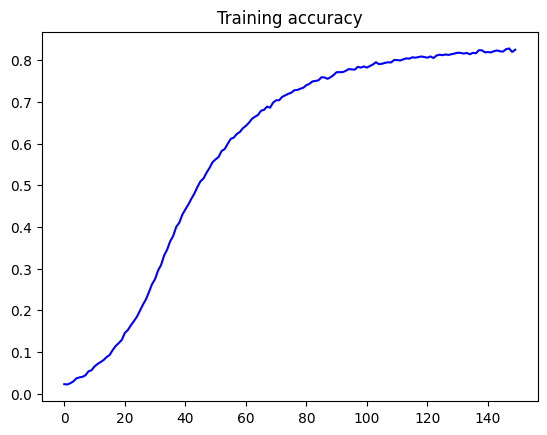

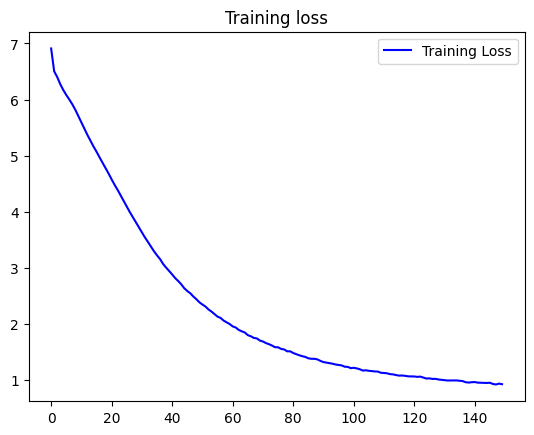

In [33]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [34]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

1/1 [==============================] - 0s 17ms/step
Help me Obi Wan Kenobi, you're my only hope receivest thine ear lies despise date each lives this fire state me do your decay lives a poet's treasure hid hate bettering state dear mind eye decay brow hate lie of thine ' be thine alone in my praise hearts brought to happy taken taken shine 'will ' lived still in thee so i have scanted all one must swear seen by day with day speechless favour junes jaws nought both weak proud nought back twain days torn decrease both painted treasure new twain twain bow bow change still eye's 'will eye must ' be found my tongue large fired
